# Part 1: Implementing Local Random Search Algorithms

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [671]:
! pip install networkx
! python --version

import time

import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

Python 3.9.12


## Flipflop Problem Implementations

In [531]:
# Initialize fitness function object using pre-defined class FlipFlop
fitness = mlrose_hiive.FlipFlop()

In [532]:
# Define optimization problem object
SIZE = 32
problem = mlrose_hiive.DiscreteOpt(length = SIZE, fitness_fn = fitness, maximize=True, max_val=2)

### Random Hill Climbing

In [533]:
# Solve using randomized hill climbing - attempt 1 (1 random attempt)
init_state = np.zeros(32)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=1, max_iters=10, restarts=1, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.0010421276092529297


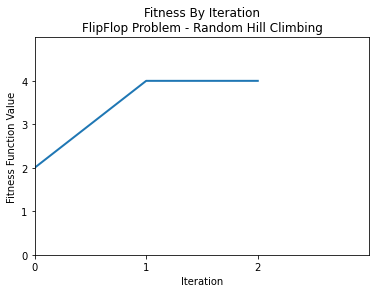

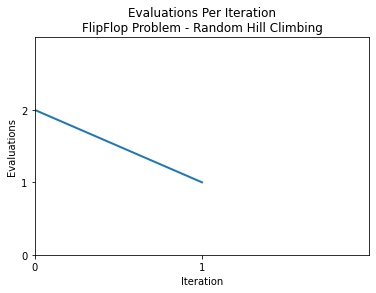

In [534]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [535]:
print('The best state found is: ', best_state)

The best state found is:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [536]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  4.0


In [537]:
# Solve using randomized hill climbing - attempt 2 (10 random attempts)
init_state = np.zeros(32)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=1, max_iters=10, restarts=10, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.007354736328125


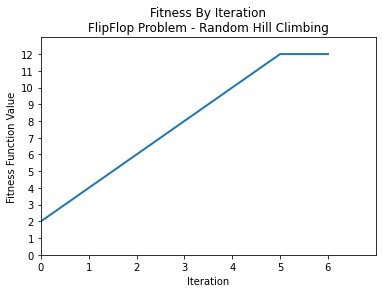

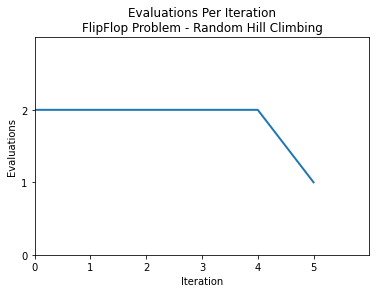

In [538]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [539]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  12.0


In [540]:
print('The best state found is: ', best_state)

The best state found is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0.]


### Simulated Annealing implementation

In [541]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [542]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 10, init_state = init_state,
                                                      random_state = 1, curve=True)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.0017430782318115234


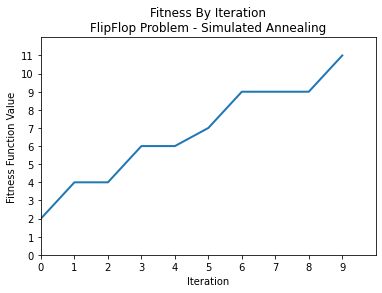

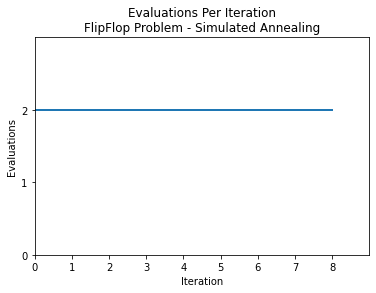

In [543]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [544]:
print('The best state found is: ', best_state)

The best state found is:  [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0.]


In [545]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  11.0


In [546]:
# Solve using simulated annealing - attempt 2 (maximum 100 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 100, init_state = init_state,  curve = True,
                                                      random_state = 1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.008281946182250977


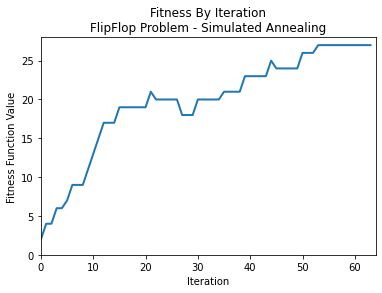

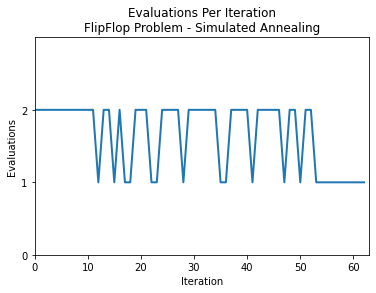

In [547]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [548]:
print('The best state found is: ', best_state)

The best state found is:  [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1.]


In [549]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  27.0


### Genetic Algorithm

In [550]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=10, mutation_prob=0.1, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
print(len(fitness_values))
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.016023874282836914
[19. 19. 21. 21. 21. 21. 21. 21. 21. 21.]
10


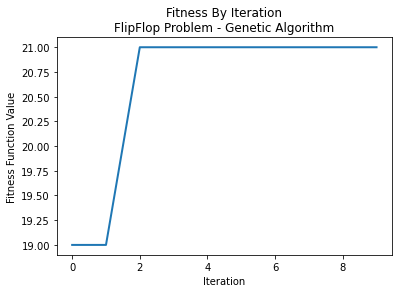

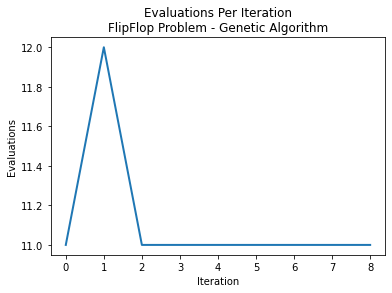

In [551]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [552]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0]


In [553]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  21.0


In [554]:
# Solve using simulated annealing - attempt 2 (maximum 20 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=10, mutation_prob=0.1, max_attempts=10, max_iters=20, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.02823805809020996


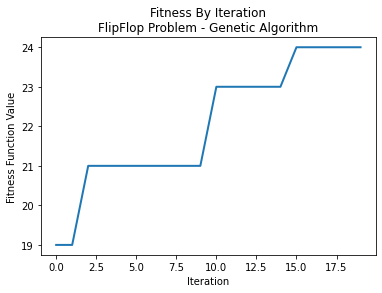

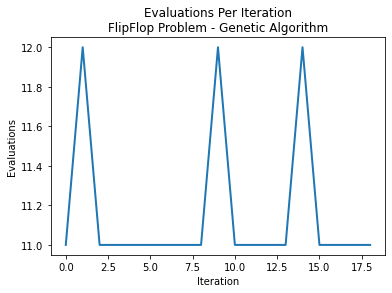

In [555]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [556]:
print('The best state found is: ', best_state)

The best state found is:  [0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0]


In [557]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  24.0


### MIMIC

In [558]:
# Solve using simulated annealing - attempt 1 (population size 20, maximum 10 attempts, maximum 10 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=20, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 2.9903640747070312


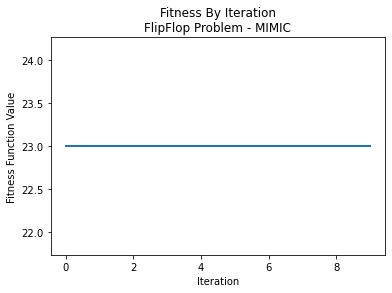

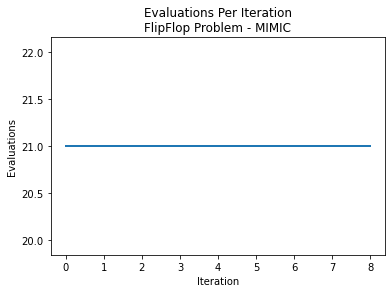

In [559]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [560]:
print('The best state found is: ', best_state)

The best state found is:  [0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1]


In [561]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  23.0


In [562]:
# Solve using simulated annealing - attempt 2 (population size 20, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=20, keep_pct=0.2, max_attempts=100, max_iters=100, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 29.608017206192017


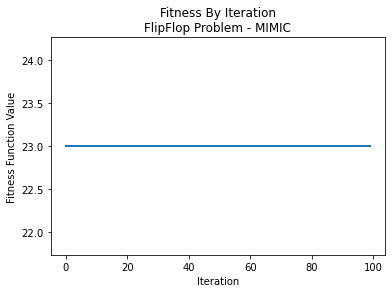

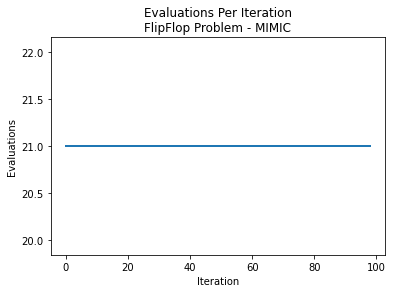

In [563]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [564]:
print('The best state found is: ', best_state)

The best state found is:  [0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1]


In [565]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  23.0


In [566]:
# Solve using simulated annealing - attempt 3 (population size 40, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=40, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 3.100785255432129


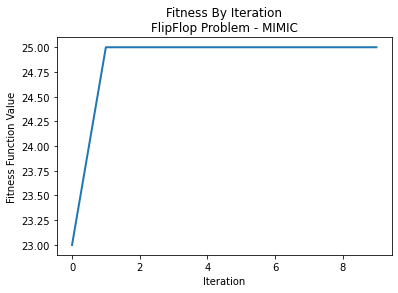

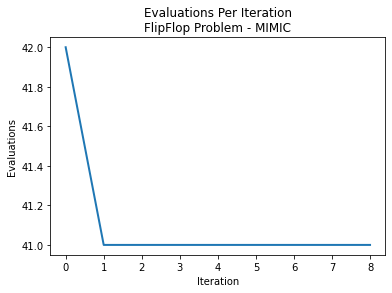

In [567]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [568]:
print('The best state found is: ', best_state)

The best state found is:  [1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0]


In [569]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  25.0


In [570]:
# Solve using simulated annealing - attempt 4 (population size 100, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 3.37376070022583


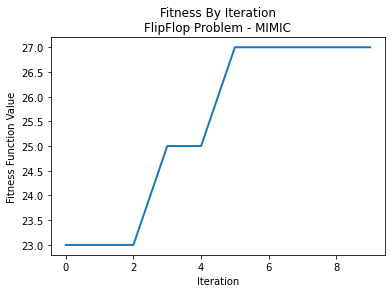

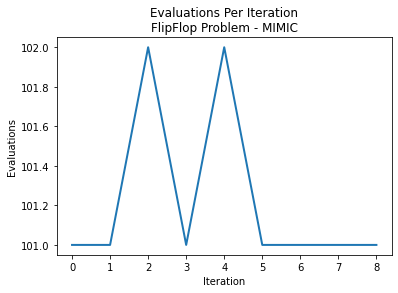

In [571]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [572]:
print('The best state found is: ', best_state)

The best state found is:  [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1]


In [573]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  27.0


In [574]:
# Solve using simulated annealing - attempt 5 (population size 200, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 3.408430814743042


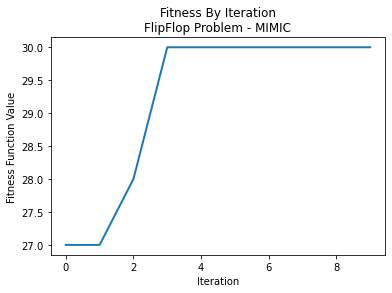

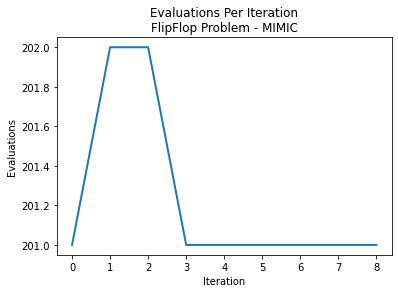

In [575]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [576]:
print('The best state found is: ', best_state)

The best state found is:  [1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [577]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  30.0


## Traveling Salesman Problem (TSP) Using Coordinate-Defined Fitness Function

In [578]:
rng = np.random.default_rng(1)

# Create list of city coordinates
CITIES = 8
coordinates = rng.integers(low=0, high=CITIES, size=(CITIES,2))
coords_list = [(c[0], c[1]) for c in coordinates]
print(coords_list)

# Initialize fitness function object using coords_list
fitness_coords = mlrose_hiive.TravellingSales(coords = coords_list)

[(3, 4), (6, 7), (0, 1), (6, 7), (1, 2), (6, 3), (2, 6), (2, 3)]


In [579]:
# Define optimization problem object
problem = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize = True)

### Randomized Hill Climbing

In [580]:
# Solve using randomized hill climbing - attempt 1 (1 random attempt)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=10, max_iters=10, restarts=1, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.002786874771118164
[[-42.35424201   2.        ]
 [-31.04053351   4.        ]
 [-31.04053351   5.        ]
 [-31.00401013   7.        ]
 [-27.99743742   9.        ]
 [-27.99743742  10.        ]
 [-27.99743742  11.        ]
 [-25.1690103   13.        ]
 [-25.1690103   14.        ]
 [-25.1690103   15.        ]]
[-42.35424201 -31.04053351 -31.04053351 -31.00401013 -27.99743742
 -27.99743742 -27.99743742 -25.1690103  -25.1690103  -25.1690103 ]
[2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0]


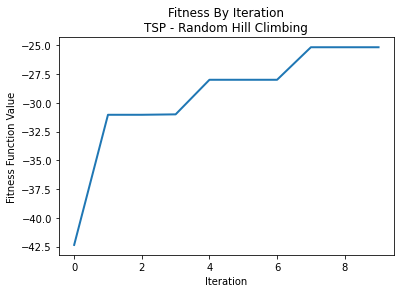

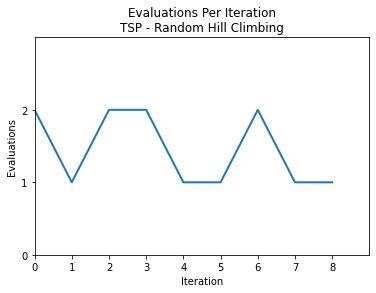

In [581]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nTSP - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [582]:
print('The best state found is: ', best_state)

The best state found is:  [5 1 3 7 0 6 4 2]


In [583]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -25.16901029769278


In [584]:
# Solve using randomized hill climbing - attempt 2 (10 random attempts)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=10, max_iters=10, restarts=10, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.008916139602661133
[[-34.627417   168.        ]
 [-34.627417   169.        ]
 [-31.17758197 171.        ]
 [-22.6923006  173.        ]
 [-22.6923006  174.        ]
 [-22.6923006  175.        ]
 [-22.6923006  176.        ]
 [-22.6923006  177.        ]
 [-22.6923006  178.        ]
 [-22.6923006  179.        ]]
[-34.627417   -34.627417   -31.17758197 -22.6923006  -22.6923006
 -22.6923006  -22.6923006  -22.6923006  -22.6923006  -22.6923006 ]
[1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


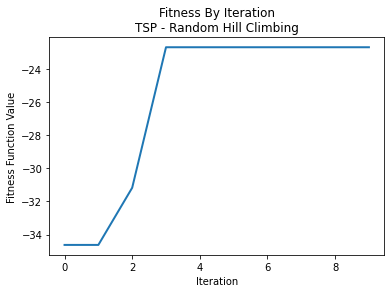

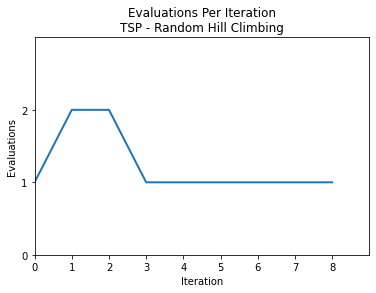

In [585]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nTSP - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [586]:
print('The best state found is: ', best_state)

The best state found is:  [0 6 2 4 7 5 1 3]


In [587]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -22.69230059649977


### Simulated Annealing implementation

In [588]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [589]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 10, init_state = init_state, curve=True,
                                                      random_state = 1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.0012829303741455078
[[-42.35424201 182.        ]
 [-31.04053351 184.        ]
 [-31.04053351 186.        ]
 [-28.0339608  188.        ]
 [-28.0339608  189.        ]
 [-28.0339608  190.        ]
 [-28.0339608  191.        ]
 [-28.0339608  192.        ]
 [-28.0339608  193.        ]
 [-28.0339608  194.        ]]
[-42.35424201 -31.04053351 -31.04053351 -28.0339608  -28.0339608
 -28.0339608  -28.0339608  -28.0339608  -28.0339608  -28.0339608 ]
[2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


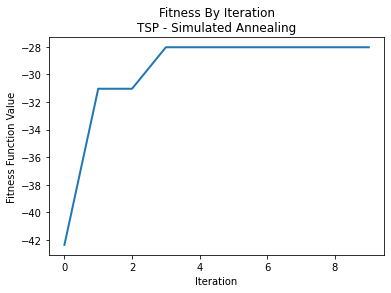

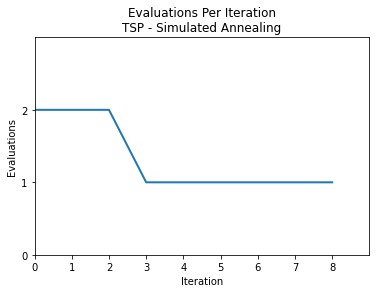

In [590]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nTSP - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [591]:
print('The best state found is: ', best_state)

The best state found is:  [7 1 3 5 4 0 6 2]


In [592]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -28.03396079721184


In [593]:
# Solve using simulated annealing - attempt 2 (maximum 100 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 100, init_state = init_state,  curve = True,
                                                      random_state = 1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.004557132720947266
[[-42.35424201 197.        ]
 [-31.04053351 199.        ]
 [-31.04053351 201.        ]
 [-28.0339608  203.        ]
 [-28.0339608  204.        ]
 [-28.0339608  205.        ]
 [-28.0339608  206.        ]
 [-28.0339608  207.        ]
 [-28.0339608  208.        ]
 [-28.0339608  209.        ]
 [-23.96399004 211.        ]
 [-23.96399004 212.        ]
 [-23.96399004 213.        ]
 [-23.96399004 215.        ]
 [-23.96399004 216.        ]
 [-23.96399004 217.        ]
 [-23.96399004 218.        ]
 [-21.43024141 220.        ]
 [-21.43024141 221.        ]
 [-21.43024141 222.        ]
 [-21.43024141 224.        ]
 [-21.43024141 225.        ]
 [-21.43024141 226.        ]
 [-21.43024141 227.        ]
 [-21.43024141 228.        ]
 [-21.43024141 229.        ]
 [-21.43024141 230.        ]
 [-21.43024141 231.        ]
 [-21.43024141 233.        ]
 [-21.43024141 234.        ]
 [-21.43024141 235.        ]
 [-21.43024141 236.        ]
 [-21.43024141 237.        ]
 [-21

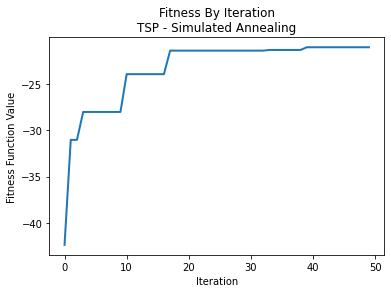

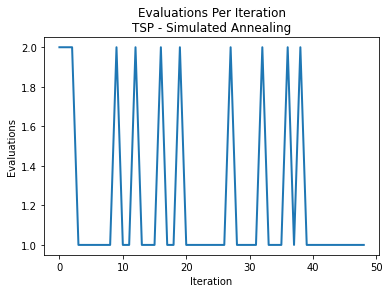

In [594]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nTSP - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [595]:
print('The best state found is: ', best_state)

The best state found is:  [0 5 1 3 6 4 2 7]


In [596]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -21.06534316089608


### Genetic Algorithm

In [597]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=10, mutation_prob=0.1, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.01248621940612793
[[-25.96399004  22.        ]
 [-25.67835776  34.        ]
 [-25.67835776  45.        ]
 [-23.94347449  57.        ]
 [-23.94347449  68.        ]
 [-23.94347449  79.        ]
 [-23.94347449  90.        ]
 [-23.94347449 101.        ]
 [-23.94347449 112.        ]
 [-23.94347449 123.        ]]
[-25.96399004 -25.67835776 -25.67835776 -23.94347449 -23.94347449
 -23.94347449 -23.94347449 -23.94347449 -23.94347449 -23.94347449]
[12.0, 11.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]


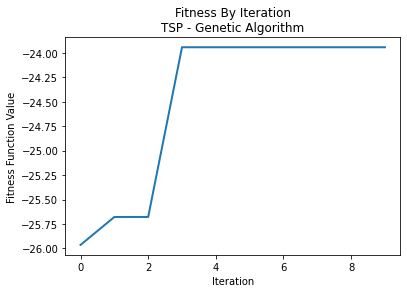

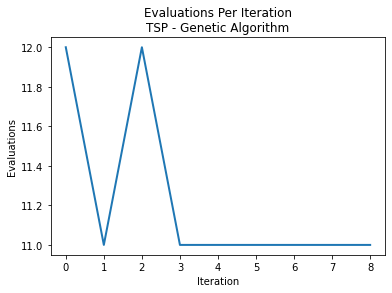

In [598]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nTSP - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [599]:
print('The best state found is: ', best_state)

The best state found is:  [5 4 7 2 0 6 3 1]


In [600]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -23.943474490948805


In [601]:
# Solve using simulated annealing - attempt 2 (maximum 20 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=10, mutation_prob=0.1, max_attempts=10, max_iters=20, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.02286982536315918
[[-25.96399004  22.        ]
 [-25.67835776  34.        ]
 [-25.67835776  45.        ]
 [-23.94347449  57.        ]
 [-23.94347449  68.        ]
 [-23.94347449  79.        ]
 [-23.94347449  90.        ]
 [-23.94347449 101.        ]
 [-23.94347449 112.        ]
 [-23.94347449 123.        ]
 [-22.6923006  135.        ]
 [-22.6923006  146.        ]
 [-22.6923006  157.        ]
 [-22.6923006  168.        ]
 [-22.6923006  179.        ]
 [-22.6923006  190.        ]
 [-22.6923006  201.        ]
 [-22.6923006  212.        ]
 [-22.6923006  223.        ]
 [-22.6923006  234.        ]]
[-25.96399004 -25.67835776 -25.67835776 -23.94347449 -23.94347449
 -23.94347449 -23.94347449 -23.94347449 -23.94347449 -23.94347449
 -22.6923006  -22.6923006  -22.6923006  -22.6923006  -22.6923006
 -22.6923006  -22.6923006  -22.6923006  -22.6923006  -22.6923006 ]
[12.0, 11.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]


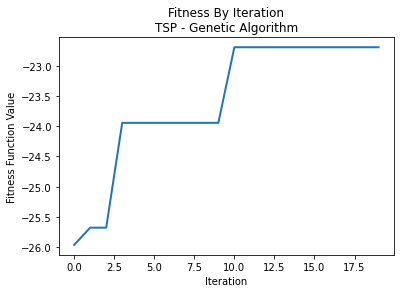

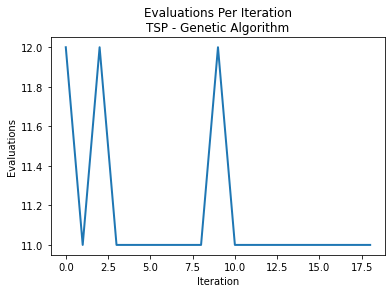

In [602]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nTSP - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [603]:
print('The best state found is: ', best_state)

The best state found is:  [5 7 4 2 6 0 1 3]


In [604]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -22.692300596499766


### MIMIC

In [605]:
# Solve using simulated annealing - attempt 1 (population size 20, maximum 10 attempts, maximum 10 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=20, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.25331997871398926
[[-23.4209462  42.       ]
 [-23.4209462  63.       ]
 [-23.4209462  84.       ]
 [-23.4209462 105.       ]
 [-23.4209462 126.       ]
 [-23.4209462 147.       ]
 [-23.4209462 168.       ]
 [-23.4209462 189.       ]
 [-23.4209462 210.       ]
 [-23.4209462 231.       ]]
[-23.4209462 -23.4209462 -23.4209462 -23.4209462 -23.4209462 -23.4209462
 -23.4209462 -23.4209462 -23.4209462 -23.4209462]
[21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0]


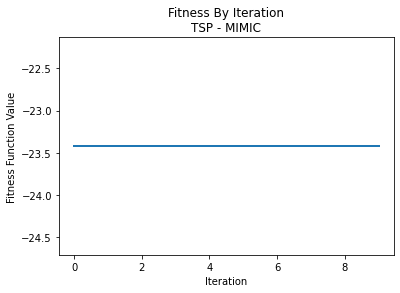

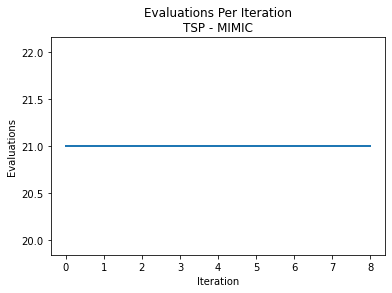

In [606]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nTSP - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [607]:
print('The best state found is: ', best_state)

The best state found is:  [7 3 1 5 0 6 4 2]


In [608]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -23.420946199897497


In [609]:
# Solve using simulated annealing - attempt 2 (population size 20, maximum 100 attempts, maximum 100 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=20, keep_pct=0.2, max_attempts=100, max_iters=100, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 2.373490810394287
[[ -23.4209462   42.       ]
 [ -23.4209462   63.       ]
 [ -23.4209462   84.       ]
 [ -23.4209462  105.       ]
 [ -23.4209462  126.       ]
 [ -23.4209462  147.       ]
 [ -23.4209462  168.       ]
 [ -23.4209462  189.       ]
 [ -23.4209462  210.       ]
 [ -23.4209462  231.       ]
 [ -23.4209462  252.       ]
 [ -23.4209462  273.       ]
 [ -23.4209462  294.       ]
 [ -23.4209462  315.       ]
 [ -23.4209462  336.       ]
 [ -23.4209462  357.       ]
 [ -23.4209462  378.       ]
 [ -23.4209462  399.       ]
 [ -23.4209462  420.       ]
 [ -23.4209462  441.       ]
 [ -23.4209462  462.       ]
 [ -23.4209462  483.       ]
 [ -23.4209462  504.       ]
 [ -23.4209462  525.       ]
 [ -23.4209462  546.       ]
 [ -23.4209462  567.       ]
 [ -23.4209462  588.       ]
 [ -23.4209462  609.       ]
 [ -23.4209462  630.       ]
 [ -23.4209462  651.       ]
 [ -23.4209462  672.       ]
 [ -23.4209462  693.       ]
 [ -23.4209462  714.       ]
 [ -23.4

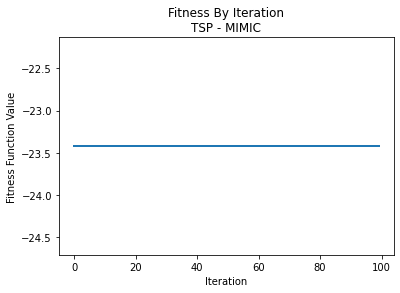

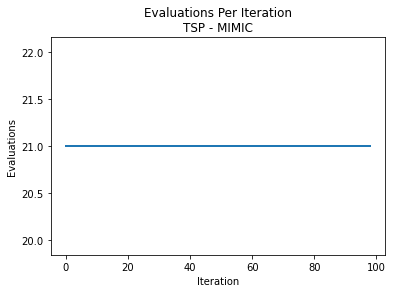

In [610]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nTSP - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [611]:
print('The best state found is: ', best_state)

The best state found is:  [7 3 1 5 0 6 4 2]


In [612]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -23.420946199897497


In [613]:
# Solve using simulated annealing - attempt 3 (population size 40, maximum 100 attempts, maximum 100 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=40, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.33102893829345703
[[-21.3564511  82.       ]
 [-21.3564511 123.       ]
 [-21.3564511 164.       ]
 [-21.3564511 205.       ]
 [-21.3564511 246.       ]
 [-21.3564511 287.       ]
 [-21.3564511 328.       ]
 [-21.3564511 369.       ]
 [-21.3564511 410.       ]
 [-21.3564511 451.       ]]
[-21.3564511 -21.3564511 -21.3564511 -21.3564511 -21.3564511 -21.3564511
 -21.3564511 -21.3564511 -21.3564511 -21.3564511]
[41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0]


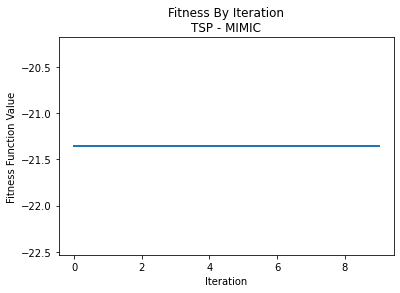

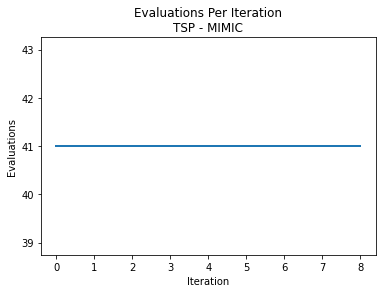

In [614]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nTSP - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [615]:
print('The best state found is: ', best_state)

The best state found is:  [7 6 3 1 5 0 2 4]


In [616]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -21.356451097651515


In [617]:
# Solve using simulated annealing - attempt 4 (population size 100, maximum 100 attempts, maximum 100 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.5501859188079834
[[ -21.11504737  202.        ]
 [ -20.92636961  304.        ]
 [ -20.92636961  405.        ]
 [ -20.92636961  506.        ]
 [ -20.92636961  607.        ]
 [ -20.92636961  708.        ]
 [ -20.92636961  809.        ]
 [ -20.92636961  910.        ]
 [ -20.92636961 1011.        ]
 [ -20.92636961 1112.        ]]
[-21.11504737 -20.92636961 -20.92636961 -20.92636961 -20.92636961
 -20.92636961 -20.92636961 -20.92636961 -20.92636961 -20.92636961]
[102.0, 101.0, 101.0, 101.0, 101.0, 101.0, 101.0, 101.0, 101.0]


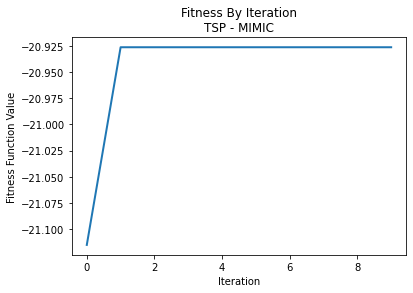

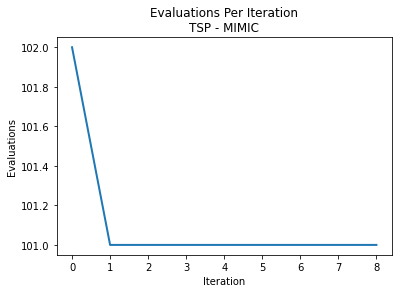

In [618]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nTSP - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [619]:
print('The best state found is: ', best_state)

The best state found is:  [1 3 6 0 7 4 2 5]


In [620]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -20.926369610573495


In [621]:
# Solve using simulated annealing - attempt 5 (population size 200, maximum 100 attempts, maximum 100 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.9088888168334961
[[ -21.06534316  402.        ]
 [ -20.92636961  604.        ]
 [ -20.92636961  805.        ]
 [ -20.92636961 1006.        ]
 [ -20.92636961 1207.        ]
 [ -20.92636961 1408.        ]
 [ -20.92636961 1609.        ]
 [ -20.92636961 1810.        ]
 [ -20.92636961 2011.        ]
 [ -20.92636961 2212.        ]]
[-21.06534316 -20.92636961 -20.92636961 -20.92636961 -20.92636961
 -20.92636961 -20.92636961 -20.92636961 -20.92636961 -20.92636961]
[202.0, 201.0, 201.0, 201.0, 201.0, 201.0, 201.0, 201.0, 201.0]


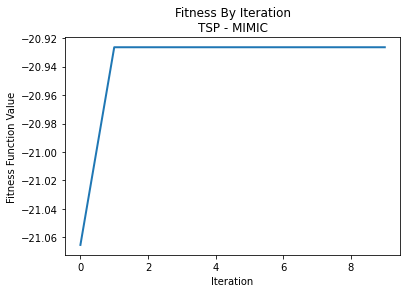

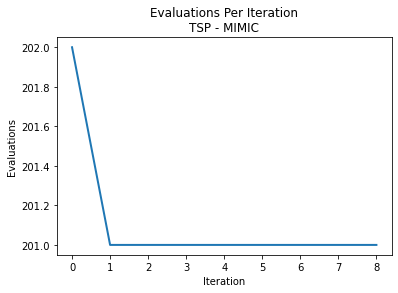

In [622]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nTSP - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [623]:
print('The best state found is: ', best_state)

The best state found is:  [3 6 0 7 4 2 5 1]


In [624]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -20.926369610573495


## 6-Peaks Problem

In [625]:
# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.SixPeaks()

In [626]:
# Define optimization problem object
DIMENSIONS = 16
problem = mlrose_hiive.DiscreteOpt(length = DIMENSIONS, fitness_fn = fitness, maximize=True, max_val=2)

### Randomized Hill Climbing

In [627]:
# Solve using randomized hill climbing - attempt 1 (1 random attempt)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=10, max_iters=10, restarts=1, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.0005533695220947266
[[16.  1.]
 [16.  2.]
 [16.  3.]
 [16.  4.]
 [16.  5.]
 [16.  6.]
 [16.  7.]
 [16.  8.]
 [16.  9.]
 [16. 10.]]
[16. 16. 16. 16. 16. 16. 16. 16. 16. 16.]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


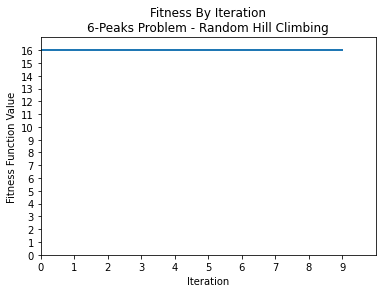

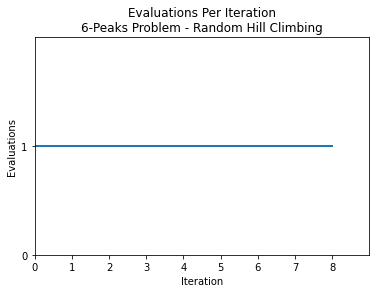

In [628]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\n6-Peaks Problem - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks Problem - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [629]:
print('The best state found is: ', best_state)

The best state found is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [630]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  16.0


In [631]:
# Solve using randomized hill climbing - attempt 2 (10 random attempts)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curves = mlrose_hiive.random_hill_climb(problem, max_attempts=10, max_iters=10, restarts=10, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curves)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.0027201175689697266
[[16. 21.]
 [16. 22.]
 [16. 23.]
 [16. 24.]
 [16. 25.]
 [16. 26.]
 [16. 27.]
 [16. 28.]
 [16. 29.]
 [16. 30.]]
[16. 16. 16. 16. 16. 16. 16. 16. 16. 16.]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


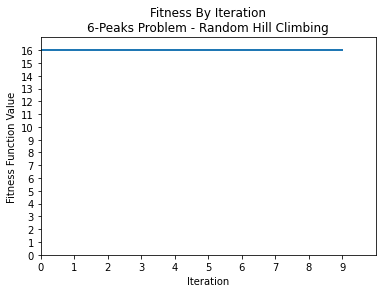

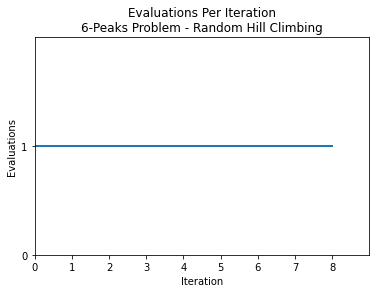

In [632]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\n6-Peaks Problem - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks Problem - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [633]:
print('The best state found is: ', best_state)

The best state found is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [634]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  16.0


### Simulated Annealing

In [635]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [636]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 10, init_state = init_state, curve = True,
                                                      random_state = 1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.00046515464782714844
[[ 16. 132.]
 [  7. 134.]
 [  7. 135.]
 [  7. 137.]
 [  7. 138.]
 [  7. 139.]
 [  7. 141.]
 [  7. 143.]
 [  7. 144.]
 [  7. 145.]]
[16.  7.  7.  7.  7.  7.  7.  7.  7.  7.]
[2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0]


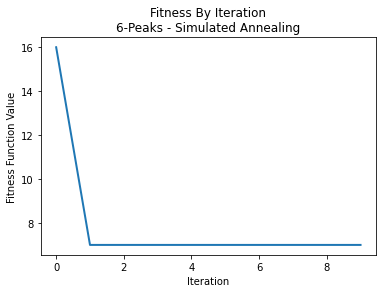

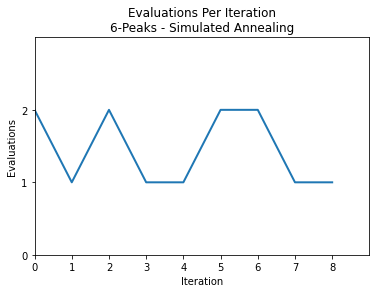

In [637]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\n6-Peaks - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [638]:
print('The best state found is: ', best_state)

The best state found is:  [1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [639]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  7.0


In [640]:
# Solve using simulated annealing - attempt 2 (maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 100, init_state = init_state,  curve = True,
                                                      random_state = 1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.0017690658569335938
[[ 16. 147.]
 [  7. 149.]
 [  7. 150.]
 [  7. 152.]
 [  7. 153.]
 [  7. 154.]
 [  7. 156.]
 [  7. 158.]
 [  7. 159.]
 [  7. 160.]
 [  7. 162.]
 [  7. 164.]
 [  7. 166.]
 [  7. 168.]
 [  7. 169.]
 [  7. 170.]
 [  7. 172.]
 [  7. 174.]
 [  7. 175.]
 [  7. 176.]
 [  7. 177.]
 [  7. 179.]
 [  6. 181.]
 [  6. 183.]
 [  6. 184.]
 [  6. 186.]
 [ 10. 188.]
 [ 10. 190.]
 [ 10. 192.]
 [ 10. 194.]
 [ 10. 195.]
 [ 10. 196.]
 [ 10. 197.]
 [ 10. 198.]
 [ 11. 200.]
 [ 11. 201.]
 [ 11. 202.]
 [ 11. 203.]
 [ 11. 204.]
 [ 11. 205.]
 [ 11. 206.]
 [ 11. 208.]
 [ 11. 209.]
 [ 11. 210.]
 [ 11. 211.]
 [ 11. 212.]
 [ 11. 213.]
 [ 11. 214.]
 [ 11. 215.]
 [ 11. 216.]
 [ 15. 218.]
 [ 15. 219.]
 [ 15. 220.]
 [ 15. 221.]
 [ 15. 222.]
 [ 15. 223.]
 [ 15. 224.]
 [ 15. 225.]
 [ 15. 226.]
 [ 15. 227.]
 [ 15. 228.]]
[16.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  6.  6.  6.  6. 10. 10. 10. 10. 10. 10. 10. 10. 11. 11.
 11. 11. 11. 11. 11. 

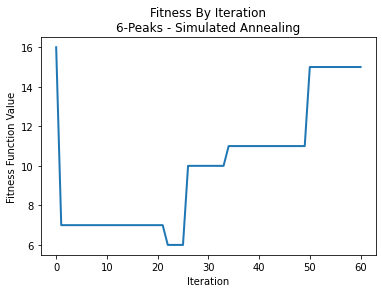

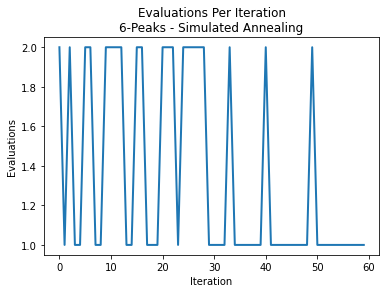

In [641]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\n6-Peaks - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [642]:
print('The best state found is: ', best_state)

The best state found is:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [643]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  15.0


### Genetic Algorithm

In [644]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=10, mutation_prob=0.1, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.007848024368286133
[[  6.  22.]
 [ 19.  34.]
 [ 21.  46.]
 [ 21.  57.]
 [ 21.  68.]
 [ 21.  79.]
 [ 21.  90.]
 [ 21. 101.]
 [ 21. 112.]
 [ 21. 123.]]
[ 6. 19. 21. 21. 21. 21. 21. 21. 21. 21.]
[12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]


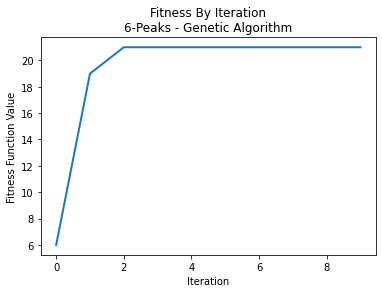

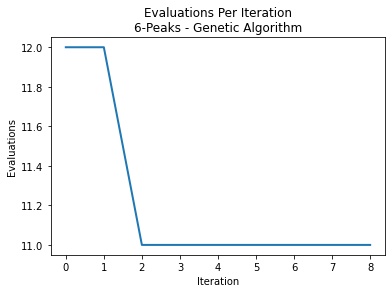

In [645]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [646]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0]


In [647]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  21.0


In [648]:
# Solve using simulated annealing - attempt 2 (maximum 20 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=10, mutation_prob=0.1, max_attempts=10, max_iters=20, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.0110321044921875
[[  6.  22.]
 [ 19.  34.]
 [ 21.  46.]
 [ 21.  57.]
 [ 21.  68.]
 [ 21.  79.]
 [ 21.  90.]
 [ 21. 101.]
 [ 21. 112.]
 [ 21. 123.]
 [ 21. 134.]
 [ 21. 145.]
 [ 21. 156.]]
[ 6. 19. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.]
[12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]


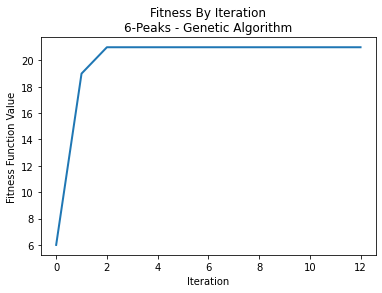

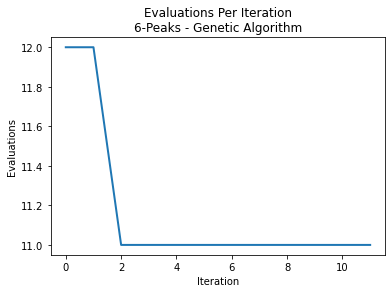

In [649]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [650]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0]


In [651]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  21.0


### MIMIC

In [652]:
# Solve using simulated annealing - attempt 1 (population size 20, maximum 10 attempts, maximum 10 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=20, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.7440340518951416
[[ 22.  42.]
 [ 22.  63.]
 [ 22.  84.]
 [ 22. 105.]
 [ 22. 126.]
 [ 22. 147.]
 [ 22. 168.]
 [ 22. 189.]
 [ 22. 210.]
 [ 22. 231.]]
[22. 22. 22. 22. 22. 22. 22. 22. 22. 22.]
[21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0]


In [653]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0]


In [654]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  22.0


In [655]:
# Solve using simulated annealing - attempt 2 (population size 20, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=20, keep_pct=0.2, max_attempts=100, max_iters=100, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 7.31137490272522
[[  22.   42.]
 [  22.   63.]
 [  22.   84.]
 [  22.  105.]
 [  22.  126.]
 [  22.  147.]
 [  22.  168.]
 [  22.  189.]
 [  22.  210.]
 [  22.  231.]
 [  22.  252.]
 [  22.  273.]
 [  22.  294.]
 [  22.  315.]
 [  22.  336.]
 [  22.  357.]
 [  22.  378.]
 [  22.  399.]
 [  22.  420.]
 [  22.  441.]
 [  22.  462.]
 [  22.  483.]
 [  22.  504.]
 [  22.  525.]
 [  22.  546.]
 [  22.  567.]
 [  22.  588.]
 [  22.  609.]
 [  22.  630.]
 [  22.  651.]
 [  22.  672.]
 [  22.  693.]
 [  22.  714.]
 [  22.  735.]
 [  22.  756.]
 [  22.  777.]
 [  22.  798.]
 [  22.  819.]
 [  22.  840.]
 [  22.  861.]
 [  22.  882.]
 [  22.  903.]
 [  22.  924.]
 [  22.  945.]
 [  22.  966.]
 [  22.  987.]
 [  22. 1008.]
 [  22. 1029.]
 [  22. 1050.]
 [  22. 1071.]
 [  22. 1092.]
 [  22. 1113.]
 [  22. 1134.]
 [  22. 1155.]
 [  22. 1176.]
 [  22. 1197.]
 [  22. 1218.]
 [  22. 1239.]
 [  22. 1260.]
 [  22. 1281.]
 [  22. 1302.]
 [  22. 1323.]
 [  22. 1344.]
 [  22. 1365.]
 [  22

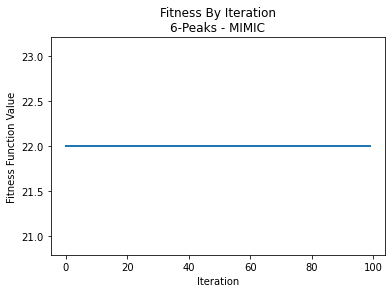

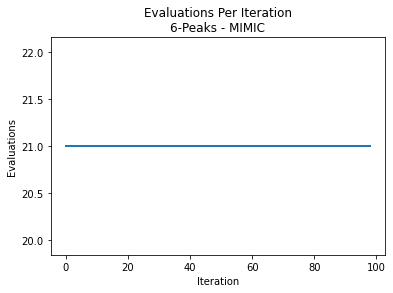

In [656]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [657]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0]


In [658]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  22.0


In [659]:
# Solve using simulated annealing - attempt 3 (population size 40, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=40, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.7847750186920166
[[ 24.  82.]
 [ 24. 123.]
 [ 24. 164.]
 [ 24. 205.]
 [ 24. 246.]
 [ 24. 287.]
 [ 24. 328.]
 [ 24. 369.]
 [ 24. 410.]
 [ 24. 451.]]
[24. 24. 24. 24. 24. 24. 24. 24. 24. 24.]
[41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0]


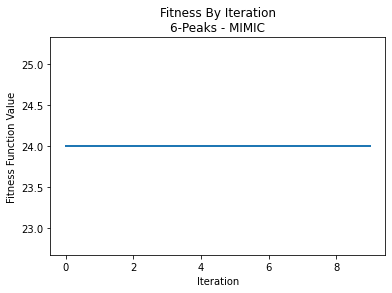

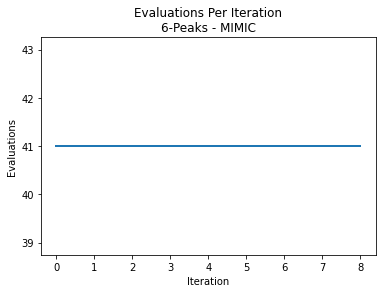

In [660]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [661]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0]


In [662]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  24.0


In [663]:
# Solve using simulated annealing - attempt 4 (population size 100, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.7852327823638916
[[  26.  202.]
 [  29.  304.]
 [  29.  405.]
 [  29.  506.]
 [  29.  607.]
 [  29.  708.]
 [  29.  809.]
 [  29.  910.]
 [  29. 1011.]
 [  29. 1112.]]
[26. 29. 29. 29. 29. 29. 29. 29. 29. 29.]
[102.0, 101.0, 101.0, 101.0, 101.0, 101.0, 101.0, 101.0, 101.0]


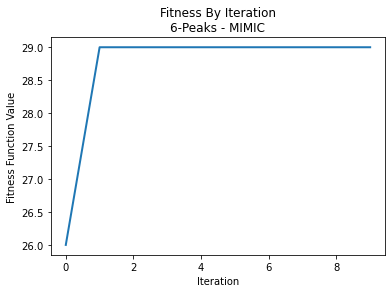

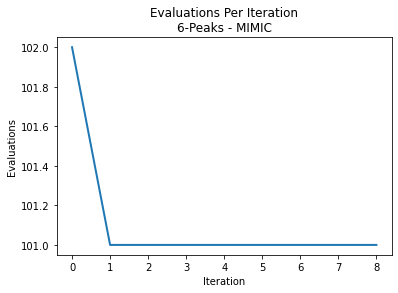

In [664]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [665]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [666]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  29.0


In [667]:
# Solve using simulated annealing - attempt 5 (population size 200, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
print(fitness_curve)
fitness_values = fitness_curve[:,0]
print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
print(evaluations)

Wall clock time: 0.7991337776184082
[[  24.  402.]
 [  25.  604.]
 [  26.  806.]
 [  28. 1008.]
 [  28. 1209.]
 [  29. 1411.]
 [  29. 1612.]
 [  29. 1813.]
 [  29. 2014.]
 [  29. 2215.]]
[24. 25. 26. 28. 28. 29. 29. 29. 29. 29.]
[202.0, 202.0, 202.0, 201.0, 202.0, 201.0, 201.0, 201.0, 201.0]


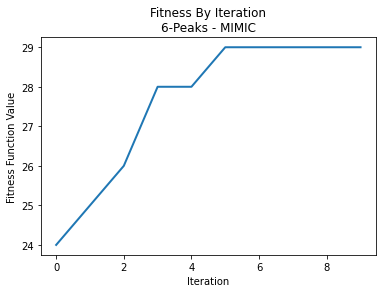

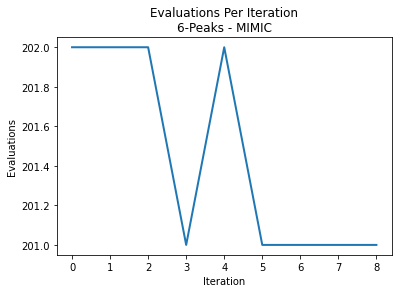

In [668]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [669]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [670]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  29.0


# Part 2: Neural Networks Tuning

In [714]:
# Load the Digits dataset
data = load_digits()

In [715]:
# Get feature values of first observation
print(data.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [716]:
# Get feature names
print(data.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [717]:
# Get target value of first observation
print(data.target)

[0 1 2 ... 8 9 8]


In [718]:
# Get target name of first observation
print(data.target_names[data.target[0]])

0


In [719]:
# Get minimum feature values
print(np.min(data.data, axis = 0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [720]:
# Get maximum feature values
print(np.max(data.data, axis = 0))

[ 0.  8. 16. 16. 16. 16. 16. 15.  2. 16. 16. 16. 16. 16. 16. 12.  2. 16.
 16. 16. 16. 16. 16.  8.  1. 15. 16. 16. 16. 16. 15.  1.  0. 14. 16. 16.
 16. 16. 14.  0.  4. 16. 16. 16. 16. 16. 16.  6.  8. 16. 16. 16. 16. 16.
 16. 13.  1.  9. 16. 16. 16. 16. 16. 16.]


In [721]:
# Get unique target values
print(np.unique(digits.target))

[0 1 2 3 4 5 6 7 8 9]


In [722]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, 
                                                    random_state = 3)

In [723]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [724]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

### Gradient Descent (Baseline)

In [791]:
# Initialize neural network object and fit object - attempt 2
nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [9], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model2.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='gradient_descent', clip_max=5, early_stopping=True,
              hidden_nodes=[9], learning_rate=0.0001, max_attempts=100,
              max_iters=1000, random_state=3)

In [792]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.9665970772442589


In [793]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.9333333333333333


### Random Hill Climbing

In [917]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 10000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = False, 
                                 clip_max = 1, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(clip_max=1, hidden_nodes=[2], learning_rate=1e-05,
              max_attempts=100, max_iters=10000, random_state=3)

In [918]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.14126652748782184


In [919]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.18888888888888888


### Simulated Annealing

In [900]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='simulated_annealing', schedule = mlrose_hiive.ExpDecay(),
                                 max_iters = 10000, bias = True, is_classifier = True, 
                                 clip_max=1, learning_rate = 0.0001, early_stopping = False, 
                                 max_attempts = 1000, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='simulated_annealing', clip_max=1, hidden_nodes=[2],
              learning_rate=0.0001, max_attempts=1000, max_iters=10000,
              random_state=3,
              schedule=ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001))

In [901]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.14126652748782184


In [902]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.18888888888888888


### Genetic Algorithm

In [914]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [9], activation ='relu', 
                                 algorithm ='genetic_alg', pop_size = 200, mutation_prob = 0.1,
                                 max_iters = 500, bias = True, is_classifier = True, 
                                 clip_max = 1, learning_rate = 0.0001, early_stopping = False, 
                                 max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='genetic_alg', clip_max=1, hidden_nodes=[9],
              learning_rate=0.0001, max_attempts=200, max_iters=500,
              random_state=3)

In [915]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.35073068893528186


In [916]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.35833333333333334
